In [1]:
#Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.
# Here is the code to load the data
# import numpy as np
# import pandas as pd
# import scipy.stats as stats
# import matplotlib.pyplot as plt
# import sklearn
# from sklearn.datasets import load_boston
# boston = load_boston()
# bos = pd.DataFrame(boston.data)

# Loading Libraries and Data

In [2]:
# Core Libraries to load (for data manipulation and analysis)

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns



# Core Libraries to load - Machine Learning
import sklearn

## Import LinearRegression Module
from sklearn.linear_model import LinearRegression

## Import train_test_split Module
from sklearn.model_selection import train_test_split

## Import boston dataset from sklearn.datasets
from sklearn.datasets import load_boston



# Import stats module from scipy for Statistical analysis
import scipy.stats as stats
 
# Load Boston dataset and create a dataframe    
boston = load_boston()
bos = pd.DataFrame(boston.data)

#Importing mean_squared_error and r2_score from sklearn.metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
%matplotlib inline

# Step 1 - Understand the dataset and data

___Get Information about the dataset and the data___


In [4]:
# Information about the dataset
print(boston) 

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [5]:
# Get keys of boston dataset dictionary
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [6]:
# Get the number of rows and columns in the dataset
boston.data.shape

(506, 13)

In [7]:
# Get the column names in the dataset
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [8]:
# Get description of the column names in the dataset
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

___Information of the dataframe created from the data set___

In [9]:
# Information of the column and top 10 elements of the dataframe 
bos.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [10]:
# Shape of the dataframe
bos.shape

(506, 13)

___Updating the dataframe to make it easy to understand the data___

In [11]:
# The column headings(0-12) need to be replaced with the column names from the dataset for ease of understanding the dataframe
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


**The dataframe is missing the target or dependent column.**


___Information about the target from boston dictionary___

In [12]:
# Shape of the target or dependent column
print(boston.target.shape)

(506,)


In [13]:
# Updating the dataframe by adding the target column  
bos["PRICE"] = boston.target

# Basic Details about Data for Data Wrangling

In [14]:
# Dataframe shape after updating 
print(bos.shape)

(506, 14)


In [15]:
# Dataframe after updating 
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


_Check for datatypes and presence of null values using info()_

In [16]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


_No cleaning required as the data is already cleaned and has no null or NaN values_

# Basic Statistical Information

___Basic Statistics of Numerical Values___

In [17]:
# All the columns are NUMERICAL. There is no categorical data to consider

##Therefore we don't need to use the parameter include=all in describe()
print(bos.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.647423   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [18]:
# Correlation --- WE can move this to exploratory analysis part
bos_corr = bos.corr()
bos_corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


# Visual Analysis OR Exploratory Analysis of the data 

## Understand the frequency distribution of the data

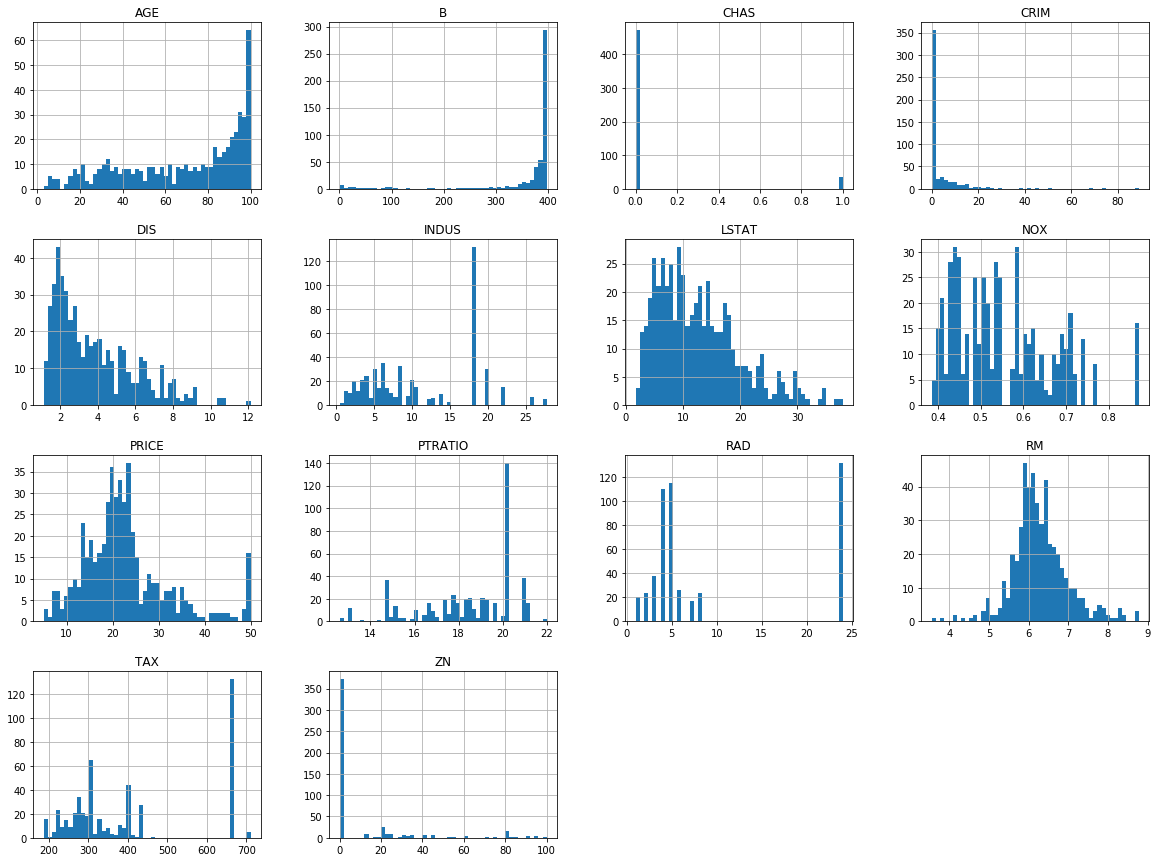

In [19]:
# Plotting the histogram of the data to understand the frequency distribution of the data
bos.hist(bins=50,figsize=(20,15))
plt.show()

## Understand the relation between different columns in the data 

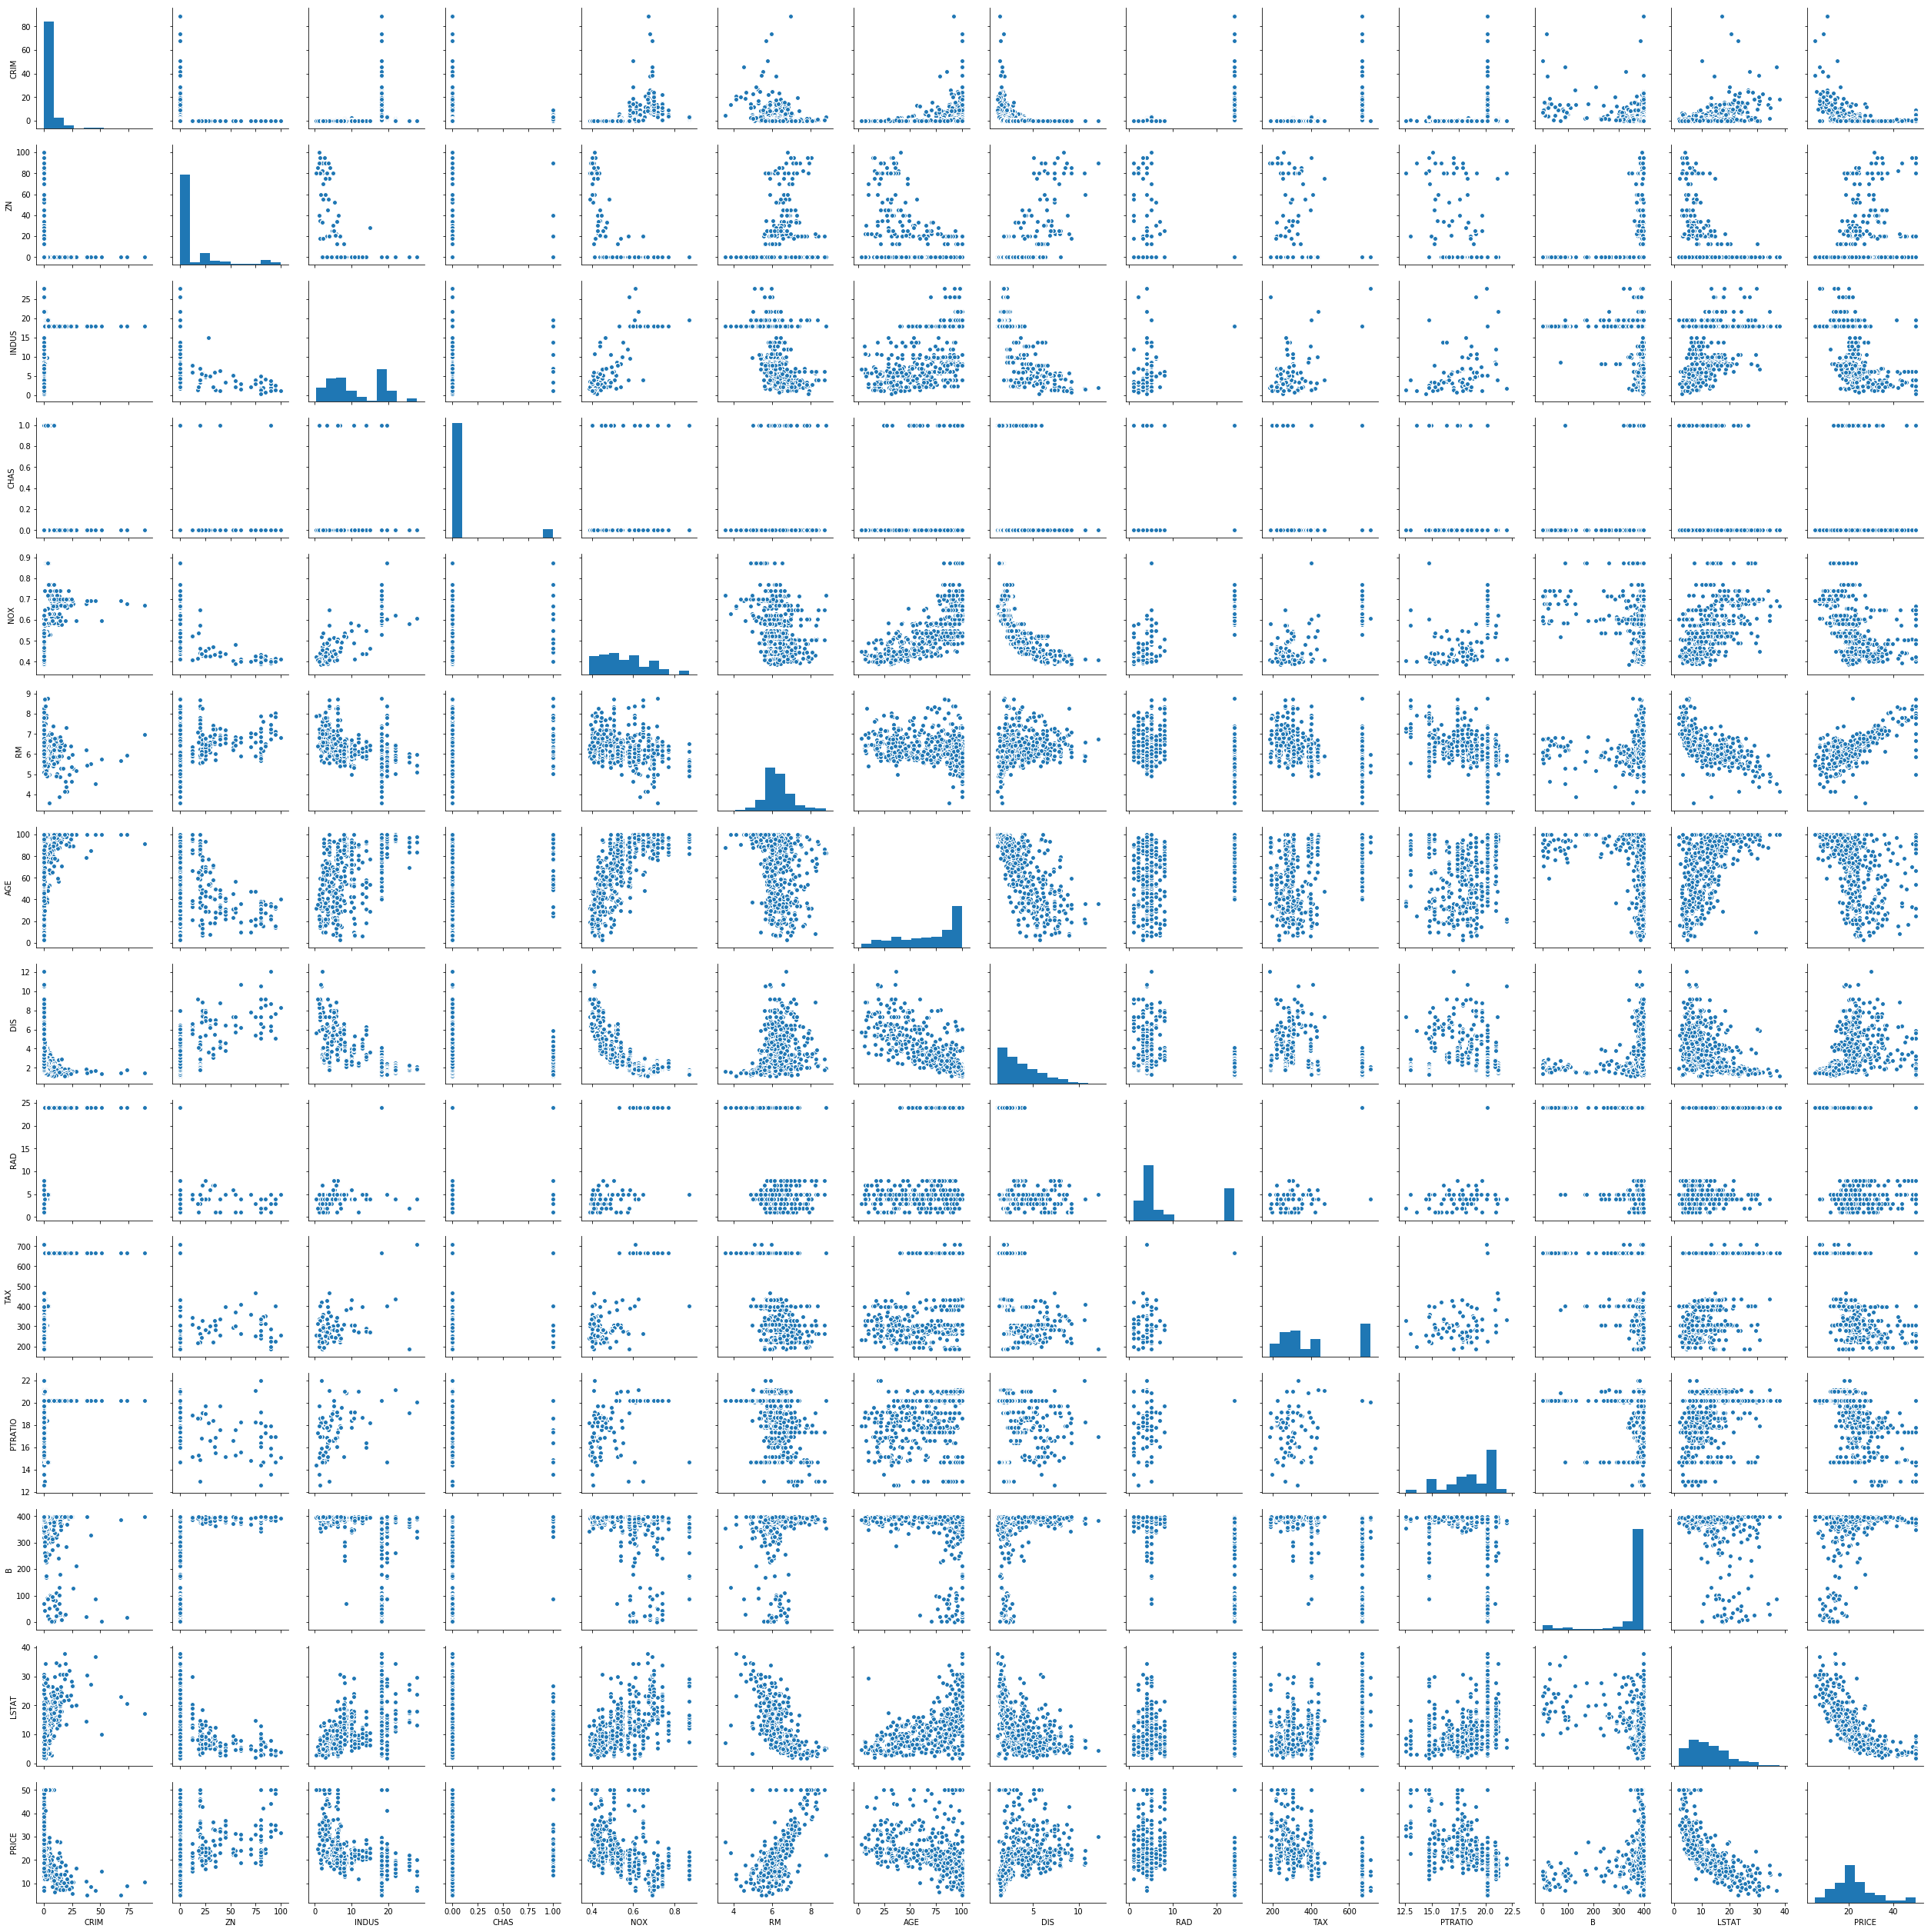

In [20]:
sns.pairplot(bos.iloc[::-1])

## Understand the correlation between variables

In [21]:
bos_corr # Correlation between different columns

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


___Note about Correlation values:___

_If absolute value of correlation co-efficient between 2 variables is >= 0.5,then they are strongly associated with each other._
_This implies, they are likely to have a stronger effect on the nature of generated model_

__RM has High positive correlation with PRICE.__
__PTRATIO and LSTAT have High negative CORRELATION with PRICE__ 

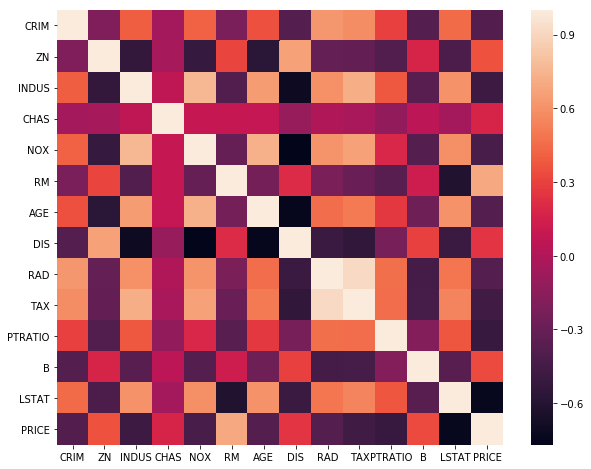

In [22]:
# Check for correlations using HEATMAP
plt.figure(figsize=(10,8))
sns.heatmap(bos_corr)

# Train and Test Split


In [23]:
X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']

_We will be using 80:20 split for train and test datasets_

In [24]:
train_x,test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2,  random_state =100)

In [25]:
print(train_x.shape)
print(test_x.shape)

(404, 13)
(102, 13)


In [26]:
print(train_y.shape)
print(test_y.shape)

(404,)
(102,)


# Fitting Regression Model

##  Baseline Model (No splits)  

In [27]:
lm = LinearRegression()

In [28]:
model = lm.fit(X, Y) # Sklearn already considers the intercepts for linear regression

In [29]:
print("Estimated Beta Coefficients: \n", model.coef_)

Estimated Beta Coefficients: 
 [-1.07170557e-01  4.63952195e-02  2.08602395e-02  2.68856140e+00
 -1.77957587e+01  3.80475246e+00  7.51061703e-04 -1.47575880e+00
  3.05655038e-01 -1.23293463e-02 -9.53463555e-01  9.39251272e-03
 -5.25466633e-01]


In [30]:
len(model.coef_)

13

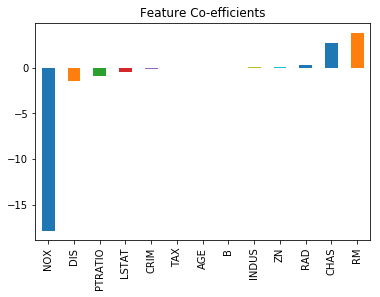

In [31]:
predictors = X.columns
coeff = pd.Series(model.coef_, predictors).sort_values()
coeff.plot(kind='bar',title='Feature Co-efficients')

In [32]:
pred_Y = model.predict(X)

In [33]:
pred_Y.mean()

22.532806324110677

In [34]:
bos.PRICE.mean()

22.532806324110698

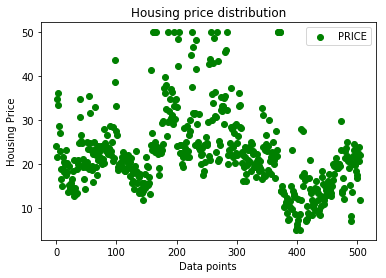

In [35]:
plt.xlabel('Data points')
plt.ylabel('Housing Price')
plt.title('Housing price distribution')
plt.scatter(range(len(Y)),Y, c= "green")
plt.legend()
plt.show()

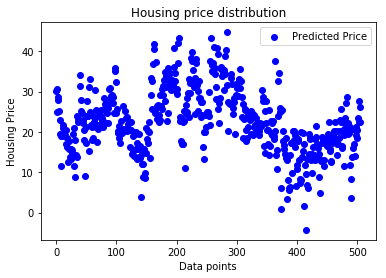

In [36]:
plt.xlabel('Data points')
plt.ylabel('Housing Price')
plt.title('Housing price distribution')
plt.scatter(range(len(pred_Y)),pred_Y, c= "blue", label = "Predicted Price")
plt.legend()
plt.show()

In [37]:
rmse = math.sqrt(mean_squared_error(Y,pred_Y))
r_squared =  r2_score(Y,pred_Y)

In [38]:
print("The RMSE of model for data with all features is: ", rmse)

The RMSE of model for data with all features is:  4.679506300635516


In [39]:
print("The r2_score of model for data with all features is: ", r_squared)

The r2_score of model for data with all features is:  0.7406077428649428


In [40]:
baseline_model_metrics = [("RMSE",rmse),  ("r2_score",r_squared)]
baseline_model_metrics

[('RMSE', 4.679506300635516), ('r2_score', 0.7406077428649428)]

## Generating Model from train test split data

In [41]:
lm = LinearRegression(normalize=True)

In [42]:
model = lm.fit(train_x.values, train_y.values) # Sklearn already considers the intercepts for linear regression

In [43]:
model.coef_

array([-8.01644009e-02,  4.79926054e-02, -5.07131765e-03,  3.06486600e+00,
       -1.61596810e+01,  3.66858142e+00, -8.46805789e-03, -1.51719956e+00,
        2.86612524e-01, -1.21155515e-02, -9.24761912e-01,  9.62688265e-03,
       -4.86676845e-01])

In [44]:
len(model.coef_)

13

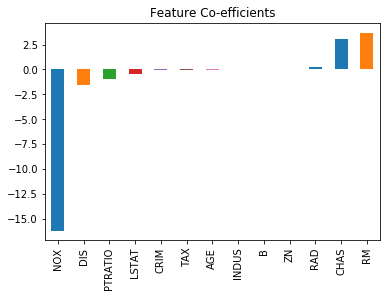

In [45]:
predictors = X.columns
coeff = pd.Series(model.coef_, predictors).sort_values()
coeff.plot(kind='bar',title='Feature Co-efficients')

In [46]:
model.intercept_

36.348033823441305

In [47]:
train_pred_y = model.predict(train_x)
test_pred_y = model.predict(test_x)

In [48]:
rmse_train = math.sqrt(mean_squared_error(train_y,train_pred_y))
rmse_test =  math.sqrt(mean_squared_error(test_y,test_pred_y))

In [49]:
print("The RMSE of model for training data with all features is: ", rmse_train )
print("The RMSE of model for test data with all features is: ", rmse_test)

The RMSE of model for training data with all features is:  4.653240348660546
The RMSE of model for test data with all features is:  4.86029412634535


In [50]:
r_squared_train = r2_score(train_y,train_pred_y)
r_squared_test = r2_score(test_y,test_pred_y)

In [51]:
print("The r2_score of model for training data with all features is: ", r_squared_train)
print("The r2_score of model for test data with all features is: ", r_squared_test)

The r2_score of model for training data with all features is:  0.7336930732880773
The r2_score of model for test data with all features is:  0.7554467329645205


In [52]:
split_model_train_metrics = [("RMSE Train",rmse_train),  ("r2_score Train",r_squared_train)]
split_model_test_metrics = [("RMSE Test",rmse_test),  ("r2_score Test",r_squared_test)]

In [53]:
split_model_train_metrics

[('RMSE Train', 4.653240348660546), ('r2_score Train', 0.7336930732880773)]

In [54]:
split_model_test_metrics

[('RMSE Test', 4.86029412634535), ('r2_score Test', 0.7554467329645205)]

In [55]:
test_pred_y.mean()

22.08998263772028

In [56]:
train_pred_y.mean()

22.62103960396039

In [57]:
bos.PRICE.mean()

22.532806324110698

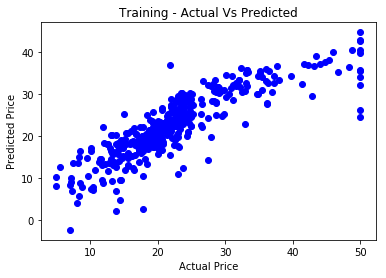

In [58]:
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Training - Actual Vs Predicted')
plt.scatter(train_y, train_pred_y, c= "blue")
plt.show()

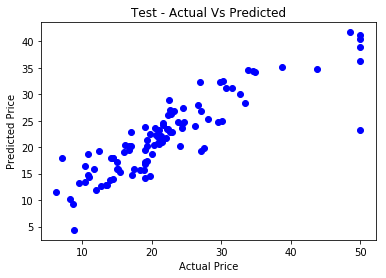

In [59]:
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Test - Actual Vs Predicted')
plt.scatter(test_y, test_pred_y, c= "blue")
plt.show()

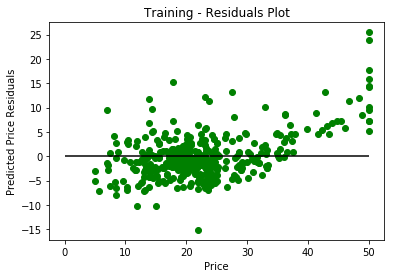

In [60]:
plt.xlabel('Price')
plt.ylabel('Predicted Price Residuals')
plt.title('Training - Residuals Plot')
plt.scatter(train_y,train_y - train_pred_y, c= "green")
plt.hlines(y=0,xmin=0,xmax=50)
plt.show()

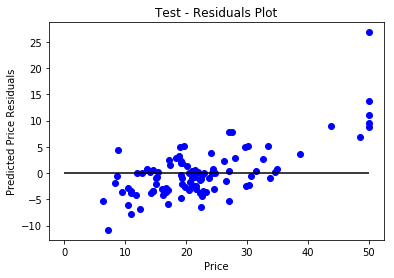

In [61]:
plt.xlabel('Price')
plt.ylabel('Predicted Price Residuals')
plt.title('Test - Residuals Plot')
plt.scatter(test_y, test_y - test_pred_y, c= "blue")
plt.hlines(y=0,xmin=0,xmax=50)
plt.show()

# Tuning Model Performance 

## Feature importance by using Random Forest Regressor

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

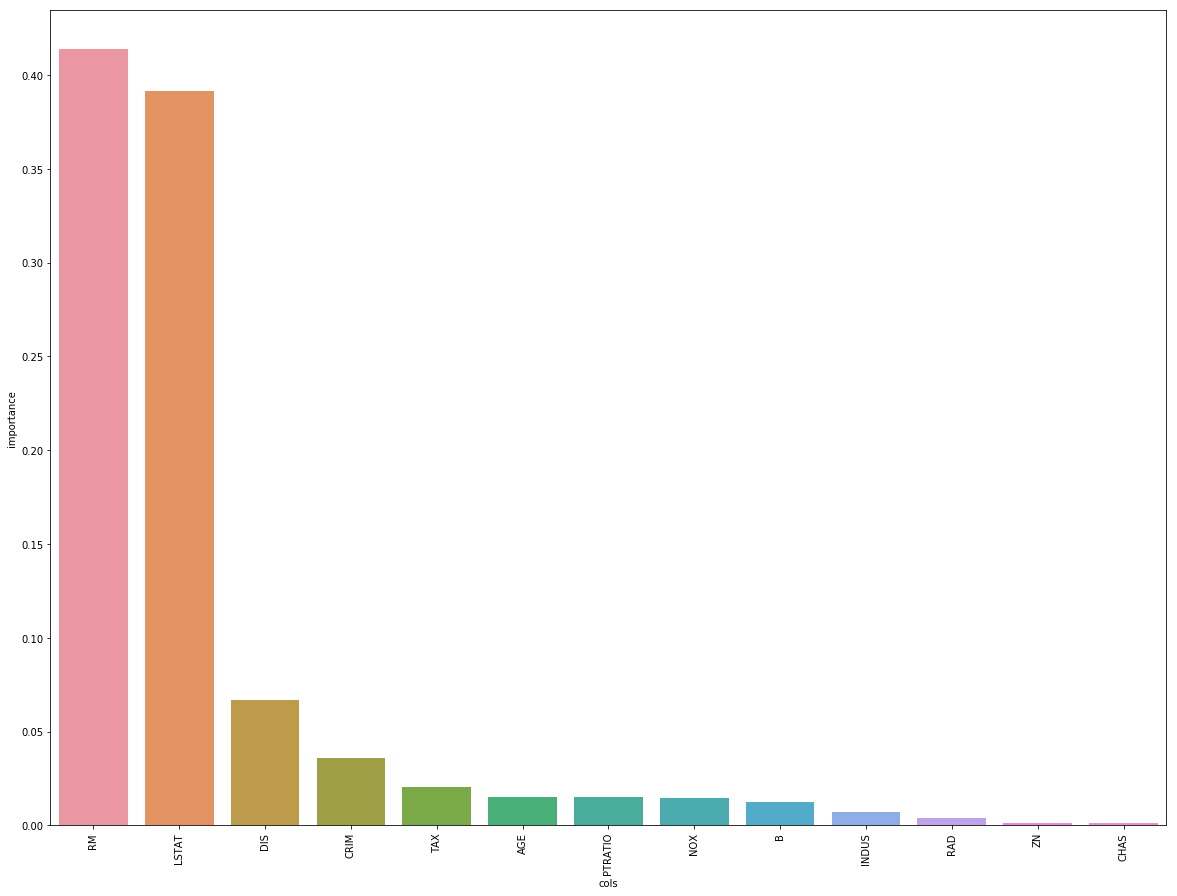

In [62]:
from sklearn.ensemble import RandomForestRegressor
rndf = RandomForestRegressor(n_estimators=150)
rndf.fit(train_x, train_y)
importance = pd.DataFrame.from_dict({'cols':train_x.columns, 'importance': rndf.feature_importances_})
importance = importance.sort_values(by='importance', ascending=False)
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(20,15))
sns.barplot(importance.cols, importance.importance)
plt.xticks(rotation=90)

### Removing  Features with  feature importance close to zero

In [63]:
# From the above, we remove 'CHAS','RAD','INDUS','ZN' to check if it improves the model metrics

In [64]:
X1 = X.drop(['CHAS','RAD','INDUS','ZN'], axis=1)
Y = bos['PRICE'] 

_We will be using 80:20 split for train and test datasets_

In [65]:
train_x1,test_x1, train_y1, test_y1 = train_test_split(X1, Y, test_size=0.2,  random_state =100)

In [66]:
print(train_x1.shape)
print(test_x1.shape)

(404, 9)
(102, 9)


In [67]:
print(train_y1.shape)
print(test_y1.shape)

(404,)
(102,)


### Generating Model from train test split data

In [68]:
lm = LinearRegression(normalize=True)

In [69]:
model = lm.fit(train_x1.values, train_y1.values) # Sklearn already considers the intercepts for linear regression

In [70]:
model.coef_

array([-1.34695878e-02, -1.43845749e+01,  4.35933680e+00, -1.61850458e-02,
       -1.23596571e+00,  2.38796078e-05, -9.95877204e-01,  9.93357824e-03,
       -4.93539187e-01])

In [71]:
len(model.coef_)

9

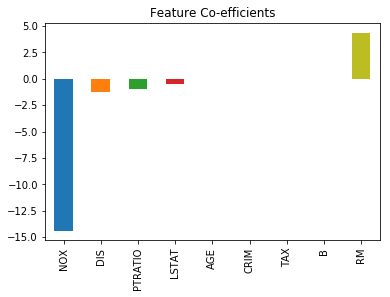

In [72]:
predictors = X1.columns
coeff = pd.Series(model.coef_, predictors).sort_values()
coeff.plot(kind='bar',title='Feature Co-efficients')

In [73]:
model.intercept_

30.08281554918792

In [74]:
train_pred_y1 = model.predict(train_x1)
test_pred_y1 = model.predict(test_x1)

In [75]:
rmse_train1 = math.sqrt(mean_squared_error(train_y1,train_pred_y1))
rmse_test1 =  math.sqrt(mean_squared_error(test_y1,test_pred_y1))

In [76]:
print("The RMSE of model for training data with some features removed is: ", rmse_train1 )
print("The RMSE of model for test data with some features removed is: ", rmse_test1)

The RMSE of model for training data with some features removed is:  4.880349369011827
The RMSE of model for test data with some features removed is:  4.990128756405006


In [77]:
r_squared_train1 = r2_score(train_y1,train_pred_y1)
r_squared_test1 = r2_score(test_y1,test_pred_y1)

In [78]:
print("The r2_score of model for training data with all features is: ", r_squared_train1)
print("The r2_score of model for test data with all features is: ", r_squared_test1)

The r2_score of model for training data with all features is:  0.7070636148635892
The r2_score of model for test data with all features is:  0.7422065561337718


In [79]:
removed_split_model_train_metrics = [("RMSE Train",rmse_train1),  ("r2_score Train",r_squared_train1)]
removed_split_model_test_metrics = [("RMSE Test",rmse_test1),  ("r2_score Test",r_squared_test1)]

In [80]:
removed_split_model_train_metrics

[('RMSE Train', 4.880349369011827), ('r2_score Train', 0.7070636148635892)]

In [81]:
removed_split_model_test_metrics

[('RMSE Test', 4.990128756405006), ('r2_score Test', 0.7422065561337718)]

In [82]:
test_pred_y1.mean()

22.41910815954261

In [83]:
train_pred_y1.mean()

22.62103960396039

In [84]:
bos.PRICE.mean()

22.532806324110698

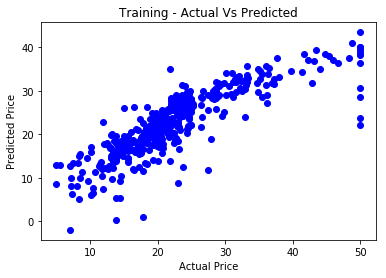

In [85]:
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Training - Actual Vs Predicted')
plt.scatter(train_y1, train_pred_y1, c= "blue")
plt.show()

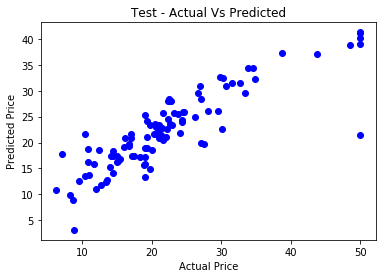

In [86]:
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Test - Actual Vs Predicted')
plt.scatter(test_y1, test_pred_y1, c= "blue")
plt.show()

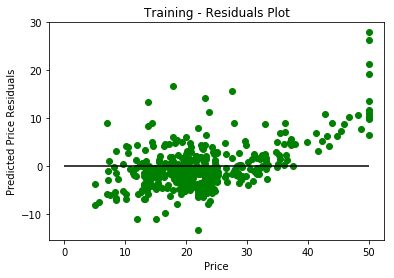

In [87]:
plt.xlabel('Price')
plt.ylabel('Predicted Price Residuals')
plt.title('Training - Residuals Plot')
plt.scatter(train_y1,train_y1 - train_pred_y1, c= "green")
plt.hlines(y=0,xmin=0,xmax=50)
plt.show()

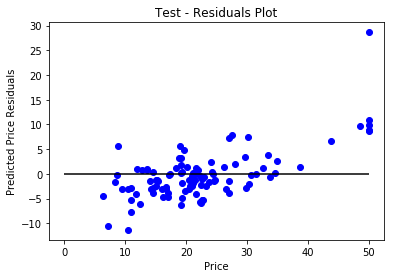

In [88]:
plt.xlabel('Price')
plt.ylabel('Predicted Price Residuals')
plt.title('Test - Residuals Plot')
plt.scatter(test_y1, test_y1 - test_pred_y1, c= "blue")
plt.hlines(y=0,xmin=0,xmax=50)
plt.show()

# Comparing the parameters of each model to choose one to deploy

In [89]:
print("Baseline Model Metrics") 
print("-"*60)
print(baseline_model_metrics)
print()

print("All Features Split Model Metrics") 
print("-"*60)
print("Train: ", split_model_train_metrics)
print("Test: ", split_model_test_metrics)
print()

print("Removed Features Split Model Metrics") 
print("-"*60)
print("Train: ", removed_split_model_train_metrics)
print("Test: ", removed_split_model_test_metrics)


Baseline Model Metrics
------------------------------------------------------------
[('RMSE', 4.679506300635516), ('r2_score', 0.7406077428649428)]

All Features Split Model Metrics
------------------------------------------------------------
Train:  [('RMSE Train', 4.653240348660546), ('r2_score Train', 0.7336930732880773)]
Test:  [('RMSE Test', 4.86029412634535), ('r2_score Test', 0.7554467329645205)]

Removed Features Split Model Metrics
------------------------------------------------------------
Train:  [('RMSE Train', 4.880349369011827), ('r2_score Train', 0.7070636148635892)]
Test:  [('RMSE Test', 4.990128756405006), ('r2_score Test', 0.7422065561337718)]


__The Baseline Model will perform w.r.t all performance metrics because, it uses more data to predict__

__Comparing the performance metrics, the model consisting of all features is the better model and can be used for predicting__

**Model Details:**

In [90]:
# This model also performs close to the baseline model
X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']
train_x,test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2,  random_state =100)
lm = LinearRegression(normalize=True)
model = lm.fit(train_x.values, train_y.values)

#Model Co-efficients:
model.coef_

array([-8.01644009e-02,  4.79926054e-02, -5.07131765e-03,  3.06486600e+00,
       -1.61596810e+01,  3.66858142e+00, -8.46805789e-03, -1.51719956e+00,
        2.86612524e-01, -1.21155515e-02, -9.24761912e-01,  9.62688265e-03,
       -4.86676845e-01])